### Task # 13:
- This is Task # 13 overall,and task 3 of Week 6
### Task # 03:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

#### Problem # 3.1:
Classifying Loan Status Using Decision Trees
Dataset:
- Loan Data
Preprocessing Steps:
- Handle missing values if any.
- Encode categorical variables (e.g., one-hot encoding for loan grade, sub-grade, etc.).
- Standardize numerical features.

Task:
- Implement a decision tree classifier to classify loan status and evaluate the model
using accuracy and ROC-AUC.

In [2]:
#importing the dataset
fp = 'loan_status.csv'

loan_df = pd.read_csv(fp)

#checking null values
print(loan_df.columns[loan_df.isnull().any()])

#a look at the dataset
loan_df.head(5)

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#the following columns ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount','Loan_Amount_Term', 'Credit_History']have the null values,
#so first lets deal with them 
#lets see the percentage of null values 
null_col = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount','Loan_Amount_Term', 'Credit_History']
loan_df[null_col].isnull().sum()/loan_df.shape[0]*100

Gender              2.117264
Married             0.488599
Dependents          2.442997
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
dtype: float64

In [4]:
#so the percentage of null values doesnt seem to be very high , and also the variables are of such nature that if we predict them it can disturb the dataset
#lets create a copy of dataset and drop the null values from it while keeping the original same
loan_df2 = loan_df.copy()
loan_df2 = loan_df2.dropna()

#verifying the result
#checking null values
print(loan_df2.columns[loan_df2.isnull().any()])

Index([], dtype='object')


In [5]:
#by looking at the sample of dataframe
#some categorical values that we have to deal are Depandant,Loan Status,Education,Self Employeed,Gender , Married and Property Area
print(loan_df2['Loan_Status'].value_counts())
print(loan_df2['Dependents'].value_counts())
print(loan_df2['Education'].value_counts())
print(loan_df2['Self_Employed'].value_counts())
print(loan_df2['Property_Area'].value_counts())
print(loan_df2['Gender'].value_counts())
print(loan_df2['Married'].value_counts())

Loan_Status
Y    332
N    148
Name: count, dtype: int64
Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64
Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64
Self_Employed
No     414
Yes     66
Name: count, dtype: int64
Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64
Gender
Male      394
Female     86
Name: count, dtype: int64
Married
Yes    311
No     169
Name: count, dtype: int64


- On the basis of above output we will use Manual label encoding for Loan Status,Gender,Married,Self Employeed, Education,Property Area while Depandants is already encoded we will just have to deal with 3+ value which are non exact numerical values

In [6]:
# label encoding the target variable manually
#label encoding for the target(Loan Status) variable
loan_df2.loc[loan_df2['Loan_Status']=='Y','Loan_Status',] = 1
loan_df2.loc[loan_df2['Loan_Status']=='N','Loan_Status',] = 0

#label encoding for Gender
loan_df2.loc[loan_df2['Gender']=='Male','Gender',] = 1
loan_df2.loc[loan_df2['Gender']=='Female','Gender',] = 0

#label encoding for Marital Status
loan_df2.loc[loan_df2['Married']=='Yes','Married',] = 1
loan_df2.loc[loan_df2['Married']=='No','Married',] = 0

#label encoding for Employement  Status
loan_df2.loc[loan_df2['Self_Employed']=='Yes','Self_Employed',] = 1
loan_df2.loc[loan_df2['Self_Employed']=='No','Self_Employed',] = 0

#label encoding for Areas Status
loan_df2.loc[loan_df2['Property_Area']=='Rural','Property_Area',] = 0
loan_df2.loc[loan_df2['Property_Area']=='Semiurban','Property_Area',] = 1
loan_df2.loc[loan_df2['Property_Area']=='Urban','Property_Area',] = 2


#label encoding for Education Status
loan_df2.loc[loan_df2['Education']=='Graduate','Education',] = 1
loan_df2.loc[loan_df2['Education']=='Not Graduate','Education',] = 0

#ensuring int datatype
loan_df2['Loan_Status'] = loan_df2['Loan_Status'].astype('int')
loan_df2['Gender'] = loan_df2['Gender'].astype('int')
loan_df2['Married'] = loan_df2['Married'].astype('int')
loan_df2['Self_Employed'] = loan_df2['Self_Employed'].astype('int')
loan_df2['Property_Area'] = loan_df2['Property_Area'].astype('int')
loan_df2['Education'] = loan_df2['Education'].astype('int')

In [7]:
# we have a 3+ which is not an exact numerical value so lets replace it with 4
loan_df2['Dependents'] = loan_df2['Dependents'].replace('3+', 4)
loan_df2['Dependents'] = loan_df2['Dependents'].astype('int')

In [8]:
#verifying the changes 
# print(loan_df2['Loan_Status'].value_counts())
# print(loan_df2['Dependents'].value_counts())
# print(loan_df2['Education'].value_counts())
# print(loan_df2['Self_Employed'].value_counts())
# print(loan_df2['Property_Area'].value_counts())
# print(loan_df2['Gender'].value_counts())
# print(loan_df2['Married'].value_counts())

In [9]:
#Again having look at the dataframe
# loan_df2.head(10)

- We can see that we have successfully converted the categorical values into numerical(Encoding) , now if we look closely at the dataframe we have some numerical that needs to be standardized such as Applicant Income,Coaaplicant Income , Loan Amount and Loan Amount Term
- Although the Decision Tree classifier is not that much sensitive to feature scaling, Decision Trees do not rely on the scale of the features. They make splits based on the threshold values of the features, so scaling doesn’t affect their performance.
- But we will do it for practice Purpose

In [10]:
#standardization
from sklearn.preprocessing import StandardScaler

# numerical features to be standardized
num_std = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']
scaler = StandardScaler()
loan_df2[num_std] = scaler.fit_transform(loan_df2[num_std])

In [11]:
#so lets have a look at the final form of our dataset
loan_df2.head(6)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,-0.137970,-0.027952,-0.208089,0.275542,1.0,0,0
2,LP001005,1,1,0,1,1,-0.417536,-0.604633,-0.979001,0.275542,1.0,2,1
3,LP001006,1,1,0,0,0,-0.491180,0.297100,-0.307562,0.275542,1.0,2,1
4,LP001008,1,0,0,1,0,0.112280,-0.604633,-0.046446,0.275542,1.0,2,1
5,LP001011,1,1,2,1,1,0.009319,0.999978,1.520245,0.275542,1.0,2,1
6,LP001013,1,1,0,0,0,-0.535332,-0.024893,-0.618413,0.275542,1.0,2,1


In [12]:
#defining features and Traget Vraiables as X and Y respectively
X = loan_df2.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_df2['Loan_Status']

In [13]:
#split for train and Test
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [14]:
#decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=42)
DTC = DTC.fit(X_train,Y_train)

#prediction
Y_pred = DTC.predict(X_test)

Accuracy: 0.7708333333333334
ROC-AUC: 0.7121848739495799


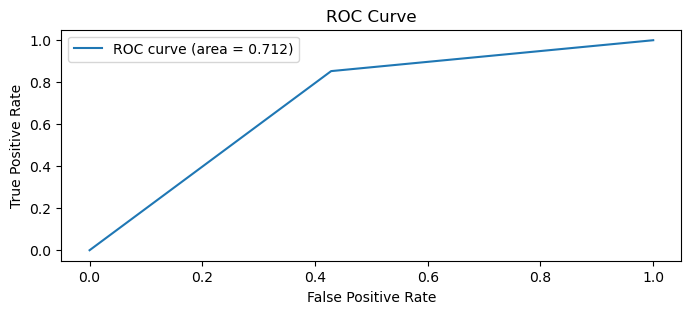

In [15]:
#evaluation
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# ROC-AUC
y_pred_proba = DTC.predict_proba(X_test)[:, 1]
auc = roc_auc_score(Y_test, y_pred_proba)
print("ROC-AUC:", auc)

# Plot the ROC curve
plt.figure(figsize=(8,3))
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve (area = {:.3f})'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### Problem # 3.2:
Predicting Hospital Readmission Using Logistic Regression
Dataset:
- Hospital Readmission Dataset
Preprocessing Steps:
- Handle missing values (e.g., fill missing values with mode for categorical variables).
- Encode categorical variables (e.g., one-hot encoding for hospital type, region, etc.).
- Standardize numerical features.

Task:
- Implement logistic regression to predict hospital readmission and evaluate the model
using precision, recall, and F1-score

In [49]:
#importing dataset
fp = 'hospital_readmissions.csv'
hospital_df = pd.read_csv(fp)

#check for null
print(hospital_df.columns[hospital_df.isnull().any()])

#a look at the dataset
hospital_df.head(3)

Index([], dtype='object')


,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes


In [50]:
# Preprocessing pipelines for numerical and categorical features
numerical_features = ['time_in_hospital', 'n_lab_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']
categorical_features = ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med']

In [51]:
#having a look at the unique values and nature of value in our categorical columns 
for col in categorical_features:
    print(f"Column = {col} Values = {hospital_df[col].unique()}")

Column = age Values = ['[70-80)' '[50-60)' '[60-70)' '[40-50)' '[80-90)' '[90-100)']
Column = medical_specialty Values = ['Missing' 'Other' 'InternalMedicine' 'Family/GeneralPractice'
 'Cardiology' 'Surgery' 'Emergency/Trauma']
Column = diag_1 Values = ['Circulatory' 'Other' 'Injury' 'Digestive' 'Respiratory' 'Diabetes'
 'Musculoskeletal' 'Missing']
Column = diag_2 Values = ['Respiratory' 'Other' 'Circulatory' 'Injury' 'Diabetes' 'Digestive'
 'Musculoskeletal' 'Missing']
Column = diag_3 Values = ['Other' 'Circulatory' 'Diabetes' 'Respiratory' 'Injury' 'Musculoskeletal'
 'Digestive' 'Missing']
Column = glucose_test Values = ['no' 'normal' 'high']
Column = A1Ctest Values = ['no' 'normal' 'high']
Column = change Values = ['no' 'yes']
Column = diabetes_med Values = ['yes' 'no']


<details>
<summary>About Encoding this dataset, Click to Expand</summary>

#### Encoding Strategy

**Ordinal Categorical Variable:**

- **age**: Use Label Encoding, as the order of categories matters.

**Nominal Categorical Variables:**

- **medical_specialty**: Use One-Hot Encoding, as these categories don't have a specific order.
- **diag_1**: Use One-Hot Encoding, as these categories don't have a specific order.
- **diag_2**: Use One-Hot Encoding, as these categories don't have a specific order.
- **diag_3**: Use One-Hot Encoding, as these categories don't have a specific order.

**Binary Categorical Variables:**

- **glucose_test**: Use Label Encoding or directly map them to numerical values (0/1/2).
- **A1Ctest**: Use Label Encoding or directly map them to numerical values (0/1/2).
- **change**: Use Label Encoding or directly map them to numerical values (0/1).
- **diabetes_med**: Use Label Encoding or directly map them to numerical values (0/1).

This approach ensures that each type of categorical variable is encoded appropriately, maintaining the inherent properties of the data while preparing it for machine learning algorithms.
</details>


In [52]:
# Label encoding categorical features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
hospital_df['age'] = le.fit_transform(hospital_df['age'])
hospital_df['glucose_test'] = le.fit_transform(hospital_df['glucose_test'])
hospital_df['A1Ctest'] = le.fit_transform(hospital_df['A1Ctest'])
hospital_df['change'] = le.fit_transform(hospital_df['change'])
hospital_df['diabetes_med'] = le.fit_transform(hospital_df['diabetes_med'])

# One-hot encoding categorical features
hospital_df = pd.get_dummies(hospital_df, columns=['medical_specialty', 'diag_1', 'diag_2', 'diag_3'],dtype='int')

# label encoding of target variable
hospital_df['readmitted'] = le.fit_transform(hospital_df['readmitted'])

In [53]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

hospital_df[numerical_features] = scaler.fit_transform(hospital_df[numerical_features])

In [54]:
# a look at the dataset 
# hospital_df.head(10)

In [55]:
# Splitting data into X and Y
X = hospital_df.drop('readmitted',axis = 1)
Y = hospital_df['readmitted']

In [56]:
# train and test data formation
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [60]:
#logistic regression
from sklearn.linear_model import LogisticRegression

# Model training
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, Y_train)

LogisticRegression(max_iter=500)

In [62]:
# Prediction on the test set
Y_pred = log_reg.predict(X_test)

# Evaluate the model
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.60      0.80      0.69      2658
           1       0.64      0.41      0.50      2342

    accuracy                           0.61      5000
   macro avg       0.62      0.60      0.59      5000
weighted avg       0.62      0.61      0.60      5000



In [65]:
from sklearn.metrics import precision_score , recall_score , f1_score
# Evaluating the model
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.64
Recall: 0.41
F1 Score: 0.50


#### Problem # 3.3:
 Classifying Digit Images Using Decision Trees
Dataset:
- MNIST Dataset
Preprocessing Steps:
- Normalize pixel values.
- Reshape data as needed for model input.

Task:
- Implement a decision tree classifier to classify handwritten digits and evaluate the
model using accuracy and confusion matrix.

In [99]:
# we can also use local machine for loading our dataset
#importing the dataset , the dataset is large so expect some time taking based on your machine
fp = 'MNIST.csv'

mnist_df = pd.read_csv(fp)

#checking for columns with NULL
print(mnist_df.columns[mnist_df.isnull().any()])

#a look at the dataset
mnist_df.head(3)

Index([], dtype='object')


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
# this data is already well prepared for further use (train test , ML model and evaluation)

# in this data set we have images of 28 x 28 dimensions which are then converted into vectors , and the value in those vector represent the greyscale 
# which can then be converted into an image  , greyscale range -> (0-255) 

pixel_data = mnist_df.drop('label',axis=1)

label_data = mnist_df['label']


In [95]:
# checking the shape of data 
print(pixel_data.shape)
print(label_data.shape)

(42000, 784)
(42000,)


- The above shows that we have 784 columns and 42000 rows , the 784 = 28x28 so 1 row is the vector representation of a single image
- While the label data contains only one column , and denotes the values of those rows 

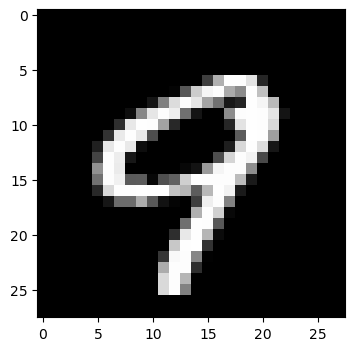

In [97]:
plt.figure(figsize=(8,4))
i = 100

grid_data = pixel_data.iloc[i].to_numpy().reshape(28,28)
plt.imshow(grid_data,interpolation = "none",cmap = "grey")

plt.show()

- The above visualization was just used for the purpose of understanding 

In [100]:
# spliting data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(pixel_data, label_data, test_size=0.2, random_state=42)


In [101]:
# normalizing the data as we mentioned above that we have a greyscale range from 0 to 255 so to keep the values normalized we 
# have to make sure the the values are in between 0 and 1 , or 0/1
# Normalize the pixel values
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

In [103]:
# decision Tree
from sklearn.tree import DecisionTreeClassifier

# tree training
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_norm, Y_train)

DecisionTreeClassifier(random_state=42)

In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix

# prediction
Y_pred = clf.predict(X_test_norm)

#accuracy
accuracy = accuracy_score(Y_test, Y_pred)
#confusion
confusion = confusion_matrix(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.8522619047619048
Confusion Matrix:
 [[744   2  10   9   7  13   9   4  12   6]
 [  1 858  11   8   1   6   4   3  14   3]
 [  9  15 684  27  17  12  18  27  28   9]
 [  7  14  24 757  11  51   5  14  37  17]
 [  4   9  12   9 712   9  15   7  20  42]
 [  7  10  12  31  14 557  31   3  26  11]
 [  5   4   7   8   8  29 699   0  23   2]
 [  8   8  29  15   9   6   1 789   2  26]
 [ 11  14  36  31  26  21  16   5 650  25]
 [  6   4  10  15  30  21   4  23  16 709]]


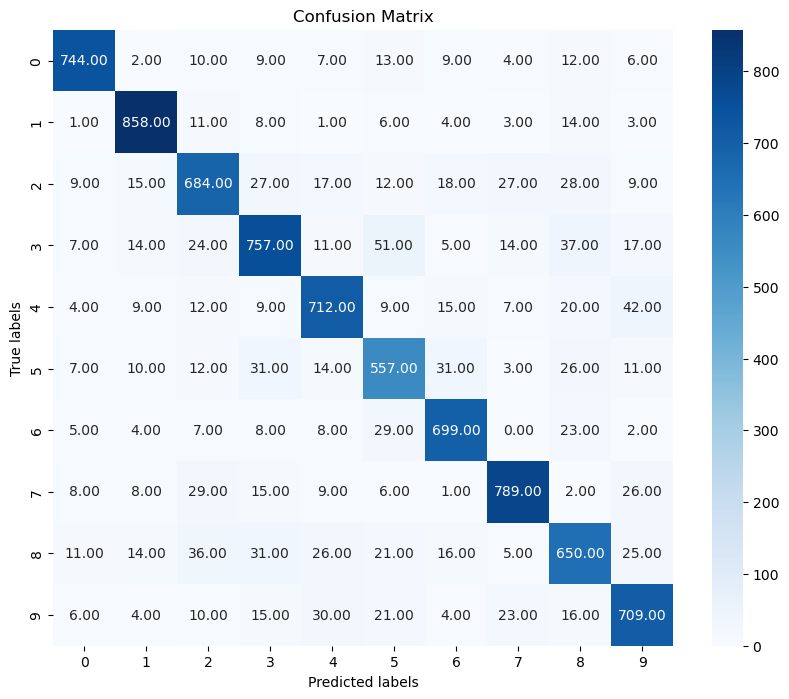

In [109]:
#Visualization of confusion Matrix

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, cmap="Blues",fmt='.2f')

# labels and title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

#### Problem # 3.4:
 Predicting Loan Approval Using Logistic Regression
Dataset:
- Loan Prediction Dataset
Preprocessing Steps:
- Handle missing values (e.g., fill missing values with mode for categorical variables).
- Encode categorical variables (e.g., one-hot encoding for gender, married status,
etc.).
- Standardize numerical features.

Task:
- Implement logistic regression to predict loan approval and evaluate the model using
accuracy and confusion matrix.


In [2]:
#importing the dataset
fp = 'loan_status.csv'

loan_df = pd.read_csv(fp)

#checking null values
print(loan_df.columns[loan_df.isnull().any()])

#a look at the dataset
loan_df.head(5)

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#the following columns ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount','Loan_Amount_Term', 'Credit_History']have the null values,
#so first lets deal with them 
#lets see the percentage of null values 
null_col = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount','Loan_Amount_Term', 'Credit_History']
loan_df[null_col].isnull().sum()/loan_df.shape[0]*100

Gender              2.117264
Married             0.488599
Dependents          2.442997
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
dtype: float64

In [4]:
#so the percentage of null values doesnt seem to be very high , and also the variables are of such nature that if we predict them it can disturb the dataset
#lets create a copy of dataset and drop the null values from it while keeping the original same
loan_df2 = loan_df.copy()
loan_df2 = loan_df2.dropna()

#verifying the result
#checking null values
print(loan_df2.columns[loan_df2.isnull().any()])

Index([], dtype='object')


In [14]:
# #by looking at the sample of dataframe
# #some categorical values that we have to deal are Depandant,Loan Status,Education,Self Employeed,Gender , Married and Property Area
# print(loan_df2['Loan_Status'].value_counts())
# print(loan_df2['Dependents'].value_counts())
# print(loan_df2['Education'].value_counts())
# print(loan_df2['Self_Employed'].value_counts())
# print(loan_df2['Property_Area'].value_counts())
# print(loan_df2['Gender'].value_counts())
# print(loan_df2['Married'].value_counts())

In [7]:
# label encoding the target variable manually
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#label encoding for the target(Loan Status) variable
loan_df2['Loan_Status'] = le.fit_transform(loan_df2['Loan_Status'])

#label encoding for Gender
loan_df2['Gender'] = le.fit_transform(loan_df2['Gender'])

#label encoding for Marital Status
loan_df2['Married'] = le.fit_transform(loan_df2['Married'])

#label encoding for Employement Status
loan_df2['Self_Employed'] = le.fit_transform(loan_df2['Self_Employed'])

#label encoding for Education Status
loan_df2['Education'] = le.fit_transform(loan_df2['Education'])

#one hot  encoding for Marital Status
# One-Hot Encoding
loan_df2 = pd.get_dummies(loan_df2, columns=['Property_Area'],dtype='int')

In [8]:
# we have a 3+ which is not an exact numerical value so lets replace it with 4
loan_df2['Dependents'] = loan_df2['Dependents'].replace('3+', 4)
loan_df2['Dependents'] = loan_df2['Dependents'].astype('int')

In [13]:
# # verifying the changes 
# print(loan_df2['Loan_Status'].value_counts())
# print(loan_df2['Dependents'].value_counts())
# print(loan_df2['Education'].value_counts())
# print(loan_df2['Self_Employed'].value_counts())
# print(loan_df2['Gender'].value_counts())
# print(loan_df2['Married'].value_counts())

In [12]:
# # Again having look at the dataframe
# loan_df2.head(10)

In [15]:
#standardization
from sklearn.preprocessing import StandardScaler

# numerical features to be standardized
num_std = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']
scaler = StandardScaler()
loan_df2[num_std] = scaler.fit_transform(loan_df2[num_std])

In [19]:
# having look at the final dataframe
loan_df2.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,LP001003,1,1,1,0,0,-0.137970,-0.027952,-0.208089,0.275542,1.0,0,1,0,0
2,LP001005,1,1,0,0,1,-0.417536,-0.604633,-0.979001,0.275542,1.0,1,0,0,1
3,LP001006,1,1,0,1,0,-0.491180,0.297100,-0.307562,0.275542,1.0,1,0,0,1
4,LP001008,1,0,0,0,0,0.112280,-0.604633,-0.046446,0.275542,1.0,1,0,0,1
5,LP001011,1,1,2,0,1,0.009319,0.999978,1.520245,0.275542,1.0,1,0,0,1
6,LP001013,1,1,0,1,0,-0.535332,-0.024893,-0.618413,0.275542,1.0,1,0,0,1
7,LP001014,1,1,4,0,0,-0.411178,0.352933,0.164933,0.275542,0.0,0,0,1,0
8,LP001018,1,1,2,0,0,-0.239871,-0.021069,0.289273,0.275542,1.0,1,0,0,1
9,LP001020,1,1,1,0,0,1.320437,3.589688,2.539838,0.275542,1.0,0,0,1,0
10,LP001024,1,1,2,0,0,-0.382215,-0.336943,-0.929265,0.275542,1.0,1,0,0,1


In [20]:
#defining features and Target Vraiables as X and Y respectively
X = loan_df2.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_df2['Loan_Status']

In [21]:
#split for train and Test
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [23]:
#logistic regression
from sklearn.linear_model import LogisticRegression

# Model training
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [24]:
# Prediction on the test set
Y_pred = log_reg.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix

# accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy}')

# Confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.8229166666666666
Confusion Matrix:
[[11 17]
 [ 0 68]]


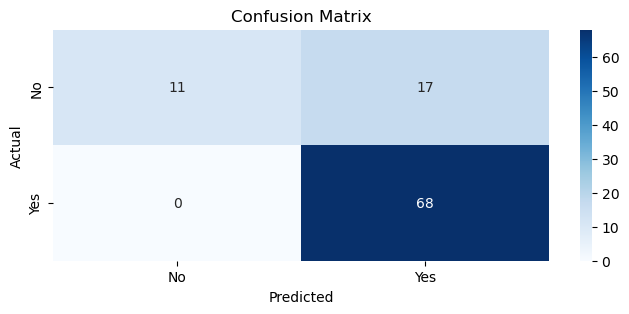

In [27]:

# Plotting
plt.figure(figsize=(8, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### Problem # 3.5:
 Classifying Wine Quality Using Decision Trees
Dataset:
- Wine Quality Dataset
Preprocessing Steps:
- Handle missing values if any.
- Standardize features.
- Encode categorical variables if present.

Task:
- Implement a decision tree classifier to classify wine quality (good/bad) and evaluate
the model using accuracy and ROC-AUC

In [45]:
#importing the dataset 
file_path = 'winequality-red.csv'
wine_df = pd.read_csv(file_path)

#check for null
print(wine_df.columns[wine_df.isnull().any()])

#a look at the dataset
wine_df.head(3)

Index([], dtype='object')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


- Lets create a criteria on the basis of which we will determine the quality of wine based on our dataset , we will consider those wine which have quality greater then 5 are good and less than or equal to are bad

In [47]:
# function to categorize wine quality as good or bad
def categorize_quality(quality):
    if quality > 5:
        return 1  # good
    else:
        return 0  # bad

wine_df['quality'] = wine_df['quality'].apply(categorize_quality)

In [48]:
# defining X and Y
X = wine_df.iloc[:,0:11]
Y = wine_df.iloc[:,11:12]

In [49]:
# standardization
from sklearn.preprocessing import StandardScaler
Standard = StandardScaler()

X_standard = Standard.fit_transform(X)
X_standard = pd.DataFrame(X_standard,columns=X.columns)
X_standard.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777


In [50]:
Y.value_counts()

quality
1          855
0          744
Name: count, dtype: int64

In [52]:
#train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_standard, Y, test_size=0.2, random_state=42)

In [53]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)

#model training
clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [57]:
# Prediction
Y_pred = clf.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score, roc_auc_score


#accuracy
accuracy = accuracy_score(Y_test, Y_pred)

#roc auc
roc_auc = roc_auc_score(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("ROC-AUC:", roc_auc)


Accuracy: 0.7375
ROC-AUC: 0.736003803637228
